Visualisieren:
../../libMultiRobotPlanning-master/example/visualize.py test.yaml output.yaml


Basic Info:
[North, East, South, West]
DO_NOTHING= 0 MOVE_FORWARD= 2 MOVE_LEFT= 1 MOVE_RIGHT= 3 STOP_MOVING= 4

In [19]:
import time


from flatland.core.env_observation_builder import ObservationBuilder
from flatland.envs.rail_env import RailEnv
from flatland.utils.rendertools import RenderTool
from flatland.core.grid.grid4_utils import get_new_position
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.schedule_generators import sparse_schedule_generator
from flatland.envs.rail_generators import rail_from_file


direction_to_str = {-1 : "pass...", 0: "North", 1: "East", 2: "South", 3: "West"}
action_to_str = {-1 : "pass...", 0 : "Do nothing", 1: "Left", 2 : "Forward", 3 : "Right", 4 : "Stop moving"}

In [371]:
# 20, 30, 3
# 25, 25, 5

render = True
print_more_info = False

try:
    
    speed_ration_map = {1.: 0.25,  # Fast passenger train
                    1. / 2.: 0.25,  # Fast freight train
                    1. / 3.: 0.25,  # Slow commuter train
                    1. / 4.: 0.25}  # Slow freight train
    
    env = RailEnv(width=50,
              height=50,
              rail_generator=sparse_rail_generator(
                  max_num_cities = 5,
                  grid_mode= False,
                  max_rails_between_cities = 5,
                  max_rails_in_city = 5, 
                  seed=10
              ),
              schedule_generator=sparse_schedule_generator(speed_ration_map),
              number_of_agents=8
    )

    
    _, info = env.reset()
    
    
    # Just do one dummy step so the Trains get a Position. My assumtion is, that it is always the same
    _, _, _, info = env.step({i : 2 for i in range(env.get_num_agents())})
    
    # Check if the result of the prioritized planning is valied
    res = pp(env, info)
    if res == -1: raise Stop

    # For rendering the Environment and the steps done by the agents
    if render: 
        env_renderer = RenderTool(env, screen_width=2000, screen_height=2000)
        env_renderer.render_env(show=True, frames=False, show_observations=False, show_predictions=False)
    
    # Empty action dictionary which has the predicted actions in it for each step
    action_dict = dict()
    
    pred_pos = dict()
    
    # For Loop with all the steps predicted by the agent
    for step in range(2000):
        # print(info)

        for handle in range(env.get_num_agents()):
        
            actions = res[handle]
            
            """
            print({env.agents[handle].speed_data["position_fraction"]})
            print(env.agents[handle].speed_data["transition_action_on_cellexit"])
            """
            
            if not actions.is_empty() and info['action_required'][handle]:
                action, pred_position = actions.pop(0)
                action_dict[handle] = action
                pred_pos[handle] = pred_position
                
                env.dev_pred_dict[handle] = actions.positions


            else:
                action_dict[handle] = 0
        
        # Do the actual step in the Enviroment based on the action_dict computed previously 
        obs, all_rewards, done, info = env.step(action_dict)

        # Print the current status of the agents in each iteration
        print(f"[{step+1:3}] In goal: {[handle for handle, status in done.items() if status]}")
        
        for handle, position in pred_pos.items():
            print(f"Aktuelle Position: {env.agents[handle].position}, gelangt nach: {pred_pos[handle]}, {env.agents[handle].speed_data['position_fraction'] / env.agents[handle].speed_data['speed']}")

        
        
        if print_more_info:
            print("Iteration:", step)
            for handle, action in action_dict.items():
                print(f"<{handle}> Action: |{action}|, Position: {env.agents[handle].position}, Target: {env.agents[handle].target}, Direction: {direction_to_str[env.agents[handle].direction]}")
                

        if render: 
            env_renderer.render_env(show=True, frames=False, show_observations=False, show_predictions=True)
            time.sleep(0.05)

        if done["__all__"]:
            print(f"\nAll Agents are in their targets! After {step+1} iterations.")
            break
            
finally:
    if render : env_renderer.close_window()


Checking if the starting positions are valid...
The positions for the 0 Step is not valid. Try one more step...
The positions are valid! Start searching...

Agent:  5 starting from: (22, 11) - heading to: (32, 24), speed: 1 --> in 0.102415sec
Agent:  0 starting from: (33, 25) - heading to: (11, 40), speed: 2 --> in 0.002132sec
Agent:  4 starting from: (18, 25) - heading to: (32, 24), speed: 2 --> in 0.000462sec
Agent:  6 starting from: (10, 40) - heading to: (17, 26), speed: 3 --> in 0.003843sec
Agent:  2 starting from: (31, 23) - heading to: (34, 38), speed: 3 --> in 0.008105sec
Agent:  1 starting from: (10, 39) - heading to: (36, 38), speed: 3 --> in 0.061646sec
Agent:  3 starting from: (12, 39) - heading to: (32, 24), speed: 4 --> in 0.140902sec
Agent:  7 starting from: (17, 25) - heading to: (13, 40), speed: 4 --> in 0.024846sec
open_window - pyglet
[  1] In goal: []
Aktuelle Position: (33, 25), gelangt nach: (34, 25), 1.0
Aktuelle Position: (10, 39), gelangt nach: (10, 38), 1.0
Ak

[ 17] In goal: []
Aktuelle Position: (38, 26), gelangt nach: (38, 27), 1.0
Aktuelle Position: (11, 35), gelangt nach: (11, 34), 2.0
Aktuelle Position: (29, 23), gelangt nach: (29, 23), 0.0
Aktuelle Position: (12, 35), gelangt nach: (12, 34), 1.0
Aktuelle Position: (25, 24), gelangt nach: (26, 24), 1.0
Aktuelle Position: (11, 17), gelangt nach: (11, 17), 0.0
Aktuelle Position: (11, 44), gelangt nach: (11, 45), 2.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 18] In goal: []
Aktuelle Position: (38, 27), gelangt nach: (38, 27), 0.0
Aktuelle Position: (11, 34), gelangt nach: (11, 34), 0.0
Aktuelle Position: (29, 23), gelangt nach: (29, 23), 0.0
Aktuelle Position: (12, 35), gelangt nach: (12, 34), 2.0
Aktuelle Position: (26, 24), gelangt nach: (26, 24), 0.0
Aktuelle Position: (11, 18), gelangt nach: (11, 18), 0.0
Aktuelle Position: (11, 45), gelangt nach: (11, 45), 0.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 19] In goal: []
Aktuelle Position: (38, 27), gelan

[ 35] In goal: [4]
Aktuelle Position: (33, 30), gelangt nach: (33, 31), 1.0
Aktuelle Position: (11, 29), gelangt nach: (11, 28), 2.0
Aktuelle Position: (29, 23), gelangt nach: (29, 23), 0.0
Aktuelle Position: (12, 31), gelangt nach: (12, 30), 3.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (22, 24), gelangt nach: (22, 24), 0.0
Aktuelle Position: (15, 46), gelangt nach: (16, 46), 2.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 36] In goal: [4]
Aktuelle Position: (33, 31), gelangt nach: (33, 31), 0.0
Aktuelle Position: (11, 28), gelangt nach: (11, 28), 0.0
Aktuelle Position: (29, 23), gelangt nach: (29, 23), 0.0
Aktuelle Position: (12, 30), gelangt nach: (12, 30), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (23, 24), gelangt nach: (23, 24), 0.0
Aktuelle Position: (16, 46), gelangt nach: (16, 46), 0.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 37] In goal: [4]
Aktuelle Position: (33, 31), gelangt na

[ 53] In goal: [4, 5]
Aktuelle Position: (33, 39), gelangt nach: (33, 40), 1.0
Aktuelle Position: (12, 24), gelangt nach: (13, 24), 2.0
Aktuelle Position: (26, 24), gelangt nach: (25, 24), 1.0
Aktuelle Position: (11, 27), gelangt nach: (11, 26), 1.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (21, 46), gelangt nach: (22, 46), 2.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 54] In goal: [4, 5]
Aktuelle Position: (33, 40), gelangt nach: (33, 40), 0.0
Aktuelle Position: (13, 24), gelangt nach: (13, 24), 0.0
Aktuelle Position: (26, 24), gelangt nach: (25, 24), 2.0
Aktuelle Position: (11, 27), gelangt nach: (11, 26), 2.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (22, 46), gelangt nach: (22, 46), 0.0
Aktuelle Position: (13, 25), gelangt nach: (13, 25), 0.0
[ 55] In goal: [4, 5]
Aktuelle Position: (33, 40), gelangt n

[ 71] In goal: [4, 5]
Aktuelle Position: (29, 44), gelangt nach: (28, 44), 1.0
Aktuelle Position: (16, 23), gelangt nach: (17, 23), 1.0
Aktuelle Position: (20, 24), gelangt nach: (19, 24), 1.0
Aktuelle Position: (12, 24), gelangt nach: (13, 24), 3.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (27, 46), gelangt nach: (28, 46), 2.0
Aktuelle Position: (13, 25), gelangt nach: (13, 24), 1.0
[ 72] In goal: [4, 5]
Aktuelle Position: (28, 44), gelangt nach: (28, 44), 0.0
Aktuelle Position: (16, 23), gelangt nach: (17, 23), 2.0
Aktuelle Position: (20, 24), gelangt nach: (19, 24), 2.0
Aktuelle Position: (13, 24), gelangt nach: (13, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (28, 46), gelangt nach: (28, 46), 0.0
Aktuelle Position: (13, 25), gelangt nach: (13, 24), 2.0
[ 73] In goal: [4, 5]
Aktuelle Position: (28, 44), gelangt n

[ 89] In goal: [4, 5]
Aktuelle Position: (20, 44), gelangt nach: (19, 44), 1.0
Aktuelle Position: (21, 24), gelangt nach: (22, 24), 1.0
Aktuelle Position: (14, 24), gelangt nach: (13, 24), 1.0
Aktuelle Position: (16, 23), gelangt nach: (17, 23), 1.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (33, 46), gelangt nach: (33, 45), 2.0
Aktuelle Position: (11, 25), gelangt nach: (11, 26), 1.0
[ 90] In goal: [4, 5]
Aktuelle Position: (19, 44), gelangt nach: (19, 44), 0.0
Aktuelle Position: (21, 24), gelangt nach: (22, 24), 2.0
Aktuelle Position: (14, 24), gelangt nach: (13, 24), 2.0
Aktuelle Position: (16, 23), gelangt nach: (17, 23), 2.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (33, 45), gelangt nach: (33, 45), 0.0
Aktuelle Position: (11, 25), gelangt nach: (11, 26), 2.0
[ 91] In goal: [4, 5]
Aktuelle Position: (19, 44), gelangt n

[107] In goal: [4, 5]
Aktuelle Position: (13, 46), gelangt nach: (12, 46), 1.0
Aktuelle Position: (27, 24), gelangt nach: (28, 24), 1.0
Aktuelle Position: (11, 27), gelangt nach: (11, 28), 1.0
Aktuelle Position: (19, 24), gelangt nach: (20, 24), 3.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (33, 40), gelangt nach: (33, 39), 2.0
Aktuelle Position: (11, 29), gelangt nach: (11, 30), 3.0
[108] In goal: [4, 5]
Aktuelle Position: (12, 46), gelangt nach: (12, 46), 0.0
Aktuelle Position: (27, 24), gelangt nach: (28, 24), 2.0
Aktuelle Position: (11, 27), gelangt nach: (11, 28), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (33, 39), gelangt nach: (33, 39), 0.0
Aktuelle Position: (11, 30), gelangt nach: (11, 30), 0.0
[109] In goal: [4, 5]
Aktuelle Position: (12, 46), gelangt n

[125] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 33), gelangt nach: (11, 34), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (34, 35), gelangt nach: (34, 34), 2.0
Aktuelle Position: (12, 33), gelangt nach: (12, 34), 1.0
[126] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 33), gelangt nach: (11, 34), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (34, 34), gelangt nach: (34, 34), 0.0
Aktuelle Position: (12, 33), gelangt nach: (12, 34), 2.0
[127] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach

[143] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 39), gelangt nach: (11, 40), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (36, 31), gelangt nach: (37, 31), 2.0
Aktuelle Position: (12, 37), gelangt nach: (12, 38), 3.0
[144] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 39), gelangt nach: (11, 40), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (37, 31), gelangt nach: (37, 31), 0.0
Aktuelle Position: (12, 38), gelangt nach: (12, 38), 0.0
[145] In goal: [0, 4, 5]
Aktuelle Position: None, gelangt nach

[161] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 45), gelangt nach: (11, 46), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (38, 27), gelangt nach: (38, 26), 2.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[162] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (11, 45), gelangt nach: (11, 46), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (38, 26), gelangt nach: (38, 26), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[163] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nac

[179] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (16, 46), gelangt nach: (17, 46), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (35, 24), gelangt nach: (34, 24), 2.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[180] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (30, 24), gelangt nach: (30, 24), 0.0
Aktuelle Position: (16, 46), gelangt nach: (17, 46), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (34, 24), gelangt nach: (34, 24), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[181] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nac

[197] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (33, 25), gelangt nach: (34, 25), 2.0
Aktuelle Position: (21, 45), gelangt nach: (22, 45), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (29, 24), gelangt nach: (28, 24), 2.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[198] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (34, 25), gelangt nach: (34, 25), 0.0
Aktuelle Position: (21, 45), gelangt nach: (22, 45), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (28, 24), gelangt nach: (28, 24), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[199] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nac

[215] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (38, 24), gelangt nach: (38, 25), 2.0
Aktuelle Position: (27, 45), gelangt nach: (28, 45), 1.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (23, 24), gelangt nach: (22, 24), 2.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[216] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (38, 25), gelangt nach: (38, 25), 0.0
Aktuelle Position: (27, 45), gelangt nach: (28, 45), 2.0
Aktuelle Position: (20, 24), gelangt nach: (20, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (22, 24), gelangt nach: (22, 24), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[217] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nac

[233] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (38, 30), gelangt nach: (37, 30), 2.0
Aktuelle Position: (32, 44), gelangt nach: (33, 44), 1.0
Aktuelle Position: (23, 24), gelangt nach: (24, 24), 3.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (19, 26), gelangt nach: (18, 26), 2.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[234] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (37, 30), gelangt nach: (37, 30), 0.0
Aktuelle Position: (32, 44), gelangt nach: (33, 44), 2.0
Aktuelle Position: (24, 24), gelangt nach: (24, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: (18, 26), gelangt nach: (18, 26), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[235] In goal: [0, 4, 5, 7]
Aktuelle Position: None, gelangt nac

[251] In goal: [0, 4, 5, 6, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (35, 33), gelangt nach: (35, 34), 2.0
Aktuelle Position: (34, 40), gelangt nach: (34, 39), 1.0
Aktuelle Position: (28, 24), gelangt nach: (29, 24), 1.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (17, 26), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[252] In goal: [0, 4, 5, 6, 7]
Aktuelle Position: None, gelangt nach: (11, 40), 0.0
Aktuelle Position: (35, 34), gelangt nach: (35, 34), 0.0
Aktuelle Position: (34, 40), gelangt nach: (34, 39), 2.0
Aktuelle Position: (28, 24), gelangt nach: (29, 24), 2.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (32, 24), 0.0
Aktuelle Position: None, gelangt nach: (17, 26), 0.0
Aktuelle Position: None, gelangt nach: (13, 40), 0.0
[253] In goal: [0, 4, 5, 6, 7]
Aktuelle Position: None, gelangt na

In [212]:
result[0].nodes

[(33, 25) | Forward | t=[5-8],
 (34, 25) | Forward | t=[9-12],
 (34, 24) | Right   | t=[13-16],
 (35, 24) | Left    | t=[17-20],
 (36, 24) | Forward | t=[21-24],
 (37, 24) | Forward | t=[25-28],
 (38, 24) | Forward | t=[29-32],
 (38, 25) | Left    | t=[33-36],
 (38, 26) | Forward | t=[37-40],
 (38, 27) | Forward | t=[41-44],
 (38, 28) | Forward | t=[45-48],
 (38, 29) | Forward | t=[49-52],
 (38, 30) | Forward | t=[53-56],
 (37, 30) | Left    | t=[57-60],
 (36, 30) | Forward | t=[61-64],
 (35, 30) | Forward | t=[65-68],
 (34, 30) | Forward | t=[69-72],
 (33, 30) | Forward | t=[73-76],
 (33, 31) | Right   | t=[77-80],
 (33, 32) | Forward | t=[81-84],
 (33, 33) | Forward | t=[85-88],
 (33, 34) | Forward | t=[89-92],
 (33, 35) | Forward | t=[93-96],
 (33, 36) | Forward | t=[97-100],
 (33, 37) | Forward | t=[101-104],
 (33, 38) | Forward | t=[105-108],
 (33, 39) | Forward | t=[109-112],
 (33, 40) | Forward | t=[113-116],
 (33, 41) | Forward | t=[117-120],
 (33, 42) | Forward | t=[121-124],


In [193]:
speed_ration_map = {1.: 0.25,  # Fast passenger train
                    1. / 2.: 0.25,  # Fast freight train
                    1. / 3.: 0.25,  # Slow commuter train
                    1. / 4.: 0.25}  # Slow freight train
    
env = RailEnv(width=50,
              height=50,
              rail_generator=sparse_rail_generator(
                  max_num_cities = 5,
                  grid_mode= False,
                  max_rails_between_cities = 5,
                  max_rails_in_city = 5, 
                  seed=0
              ),
              schedule_generator=sparse_schedule_generator(speed_ration_map),
              number_of_agents=2
    )

_, info = env.reset()

# print(env.agents)

In [211]:
result = pp(env, info)

Checking if the starting positions are valid...
Agent:  1 starting from: (10, 40) - heading to: (36, 38), speed: 3 --> in 0.004554sec
Agent:  0 starting from: (32, 25) - heading to: (11, 40), speed: 4 --> in 0.006136sec


In [2]:
class NextCell():
    
    def __init__(self, position, action, cost, direction):
        self.position = position
        self.action = action
        self.cost = cost
        self.direction = direction

    def __repr__(self):
        return f"{self.position} | {action_to_str[self.action]} | {self.cost} | {direction_to_str[self.direction]}"


# Position, action, cost, direction
def calc_next_cell(position, direction, handle):            
    """
    for i in range(4):
        print(direction_to_str[i], i)
        print(calc_next_cell((33, 46), i, 6))
        print("-" * 50 + "\n")
    """
    
    possible_transitions = env.rail.get_transitions(*position, direction)

    # This should be never true when searching with the a star algorithm
    if all(d == 0 for d in possible_transitions):
        print("This Direction is not permissable!")
        return -1
    
    # Initalize the next_cells with the action when there is done nothing/waiting (4), because this is alway possible
    next_cells = [NextCell(position, 4, env.distance_map.get()[handle, position[0], position[1], direction], direction)]

    # Loop trough all the possible dirrections the agent can reach from current direction
    for d in [(direction + i) % 4 for i in range(-1, 2)]:
        
        if possible_transitions[d]:
            
            # Die neue Position, wenn man die jeweilige direction 
            new_position = get_new_position(position, d)
            
            
            # Die Distanz von einer Position zum Ziel des jeweiligen Agenten
            dist = env.distance_map.get()[handle, new_position[0], new_position[1], d]
            
            # Check the given directions and map it to the corresponding action
            if d == direction:
                next_cells.append(NextCell(new_position, 2, dist, d))

            elif (d + 1) % 4 == direction:
                next_cells.append(NextCell(new_position, 1, dist, d))
                
            elif (d - 1) % 4 == direction:
                next_cells.append(NextCell(new_position, 3, dist, d))
    
    else:
    
        # Check if the transition is an dead End
        if possible_transitions[(direction + 2) % 4] == 1:
            direction = (direction + 2) % 4

            new_position = get_new_position(position, direction)

            dist = env.distance_map.get()[handle, new_position[0], new_position[1], direction]

            next_cells.append(NextCell(new_position, 2, dist, direction))
    
    return next_cells


In [331]:
import heapq


class A_Star_result():
    succes = 1
    fail = 2
    
    def __init__(self, status=succes, nodes=[], iterations=-1):
        self.status = status
        self.nodes = nodes
        
        self.actions = []
        self.positions = []

        for node in nodes:
            self.actions.append(node.action)
            self.positions.append(node.position)
            
        self.iterations = iterations

    def __repr__(self):
        if self.status == A_Star_result.succes:
            return f"Succes! actions: {self.actions}, positions: {self.positions}"
        else:
            return f"No Solution! Failed in {self.iterations} iterations..."
        
    def is_empty(self):
        return len(self.actions) == 0
    
    def get_n_action(self, n):
        if n < 0 or n >= len(self.actions):
            raise "Error: Trying to get acces to an action with an undifinded timestep!"
            
        return self.actions[n]
    
    def pop(self, n=0):
        if n < 0 or n >= len(self.actions):
            raise "Error: Trying to get acces to an action with an undifinded timestep!"
        
        return (self.actions.pop(n), self.positions.pop(n))


class Node:
    def __init__(self, position, parent=None, action=None, cost=-1, direction=None, start=-1, stop=-1):
        self.position = position
        self.parent = parent
        self.action = action
        self.cost = cost
        self.direction = direction
        self.start = start
        self.stop = stop

        self.states = [(position, direction, timestamp) for timestamp in range(start, stop+1)]
    
    def __lt__(self, other):
        return self.cost < other.cost
    
    def __repr__(self):
        if self.action is not None and self.direction is not None:
            return f"{self.position} | {action_to_str[self.action]:7s} | {self.cost:3} | {direction_to_str[self.direction]:5s} | t=[{self.start}-{self.stop}]"
        elif self.action:
            return f"{self.position} | {action_to_str[self.action]:7s} | t=[{self.start}-{self.stop}]"
        else:
            return f"{self.position} | t=[{self.start}-{self.stop}]"
    
    def check_possible(self, other_obstacles):
        
        for timestamp in range(self.start, self.stop+1):
            # Get all the obstacles in the current timestamp
            res = other_obstacles.get(timestamp)

            if res is None: continue

            # Check if there is a obstacle with the same position. If there is an overlap, otherwise it is ok
            for n in res:
            
                if self.position == n: return False

        return True
            

def make_root_node(postion, direction, interval):
    return Node(postion, None, None, 0, direction, 1, interval)

def make_node(position, parent, action, cost, direction, interval):
    if action == 4:
        return Node(position, parent, action, cost, direction, parent.stop+1, parent.stop+1)
        
    return Node(position, parent, action, cost, direction, parent.stop+1, parent.stop+interval)

def extract_solution(node):
    sol = []
    
    while node.parent is not None:
        sol.append(Node(node.position, action=node.action, start=node.start, stop=node.stop))

        node = node.parent
    
    # Also append the parent (TEST)
    # sol.append(Node(node.position, action=2, start=node.start, stop=node.stop))
    return sol[::-1]

In [188]:

def a_star(handle, position, direction, target, other_obstacles, interval):

    open_list = []
    heapq.heappush(open_list, make_root_node(position, direction, interval))
    
    closed_list = []
    distance = {}

    i = 0
    while len(open_list) > 0:
        
        node = heapq.heappop(open_list)

        if len([state for state in node.states if state in closed_list]) == 0 or len([state for state in node.states if node.cost >= distance[state]]) == 0:
            
            # Extend all the States corresponding to the states the agent is at a certain time
            closed_list.extend(node.states)
            
            for state in node.states:
                distance[state] = node.cost
            
            # Return the calculated nodes when the target is reached
            if node.position == target: return A_Star_result(A_Star_result.succes, extract_solution(node))
        
            # List with all the subsequent cells created as nodes
            next_cells = calc_next_cell(node.position, node.direction, handle)
            succ_cells = [make_node(n.position, node, n.action, n.cost, n.direction, interval) for n in next_cells]
            
            # Check if the subsequent cells has an overlap with other obstacles to the specific interval
            app_cells = [pos_node.check_possible(other_obstacles) for pos_node in succ_cells]
    

            # Zusammenfassung: Nimm den Zeitpunkt des Stopp_moving Fehlers und lösche die Nodes, welche
            # den gleichen Zeitpunkt und die gleiche Position wie andere obsacles haben
            if app_cells[0] == False:
                
                pass  # Keine weitere Aktion und die eigene Stopp-aktion ist nicht anwendbar    
            
            # When there is a False in the rest of the applicable cells, without the first stop_moving one
            elif not all(app_cells[1:]):
                
                # Die Stopp-Aktion wird immer hinzugefügt
                heapq.heappush(open_list, succ_cells[0])

                # Alle Aktionen, die False sind werden rausgeworfen
                for n, app in enumerate(app_cells[1:]):

                    if not app: continue
                    
                    heapq.heappush(open_list, succ_cells[n+1])

            else:
                
                # If there is no stop_moving or other error, then all the next cells can get appended
                for succ in succ_cells:
                    
                    heapq.heappush(open_list, succ)

        i += 1
                
    return A_Star_result(A_Star_result.fail, iterations=i)


nodes = a_star(0, (32, 25), 2, (11, 40), {}, 2)

In [366]:
def calc_steps(info):
    
    lst = [int(1 / speed) for speed in info["speed"].values()]


    steps = []

    for curr_speed in range(1, max(lst)+1):

        acc = {}
        for handle, speed in enumerate(lst):

            if curr_speed <= speed:
                acc[handle] = 2
            else:
                acc[handle] = 4

        steps.append(acc)
        
    return steps


def pp(env, info):
    
    print("Checking if the starting positions are valid...")
    
    for iters in range(4):

        valid = True
        positions = []
        for handle in range(env.get_num_agents()):

            agent = env.agents[handle]

            if agent.position not in positions and agent.position is not None:
                positions.append(agent.position) 
            else:
                valid = False
                print(f"The positions for the {iters} Step is not valid. Try one more step...")
                
                steps = calc_steps(info)
                
                for step in steps:
                    _, _, _, info = env.step(step)
                
                break
                
        if valid:
            print("The positions are valid! Start searching...\n")
            break
            
    if not valid:
        print("Coudln't find valid starting positions. Try other enviroment!\n")
        return -1
    
    

    agents = []

    for handle, speed in info["speed"].items():

        heapq.heappush(agents, SearchAgent(handle, int(1 / speed)))
            
    
    schedules = {}
    seen = {}
    
    for _ in range(env.get_num_agents()):
        
        search_agent = heapq.heappop(agents)
        
        agent = env.agents[search_agent.handle]
        
        position = agent.position
        direction = agent.direction
        target = agent.target
        
        print(f"Agent: {search_agent.handle:2} starting from: {position} - heading to: {target}, speed: {search_agent.speed}", end=" --> ")

        
        time_start = time.time()
        
        # Get the path of the current agent with the already seen states
        res = a_star(search_agent.handle, position, direction, target, seen, search_agent.speed)
        
        print(f"in {time.time()-time_start:5f}sec")
        
        for timestamp in range(1, search_agent.speed+1):
            
            seen.setdefault(timestamp, []).append((position))
        

        for node in res.nodes:

            for timestamp in range(node.start, node.stop+1):

                seen.setdefault(timestamp, []).append((node.position))

        if res.status == A_Star_result.fail:
            print(f"Agent <{handle}> couldn't find an target!")
            return -1

        schedules[search_agent.handle] = res
        
    return schedules

pp(env, info)

Checking if the starting positions are valid...
The positions are valid! Start searching...

Agent:  1 starting from: (10, 40) - heading to: (36, 38), speed: 1 --> in 0.116139sec
Agent:  2 starting from: (32, 23) - heading to: (34, 38), speed: 1 --> in 0.004104sec
Agent:  3 starting from: (12, 40) - heading to: (32, 24), speed: 3 --> in 0.001908sec
Agent:  0 starting from: (32, 25) - heading to: (11, 40), speed: 4 --> in 0.014427sec


{1: Succes! actions: [2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2], positions: [(10, 39), (10, 38), (11, 38), (11, 37), (11, 36), (11, 35), (11, 34), (11, 33), (11, 32), (11, 31), (11, 30), (11, 29), (11, 28), (11, 27), (11, 26), (11, 25), (11, 24), (12, 24), (13, 24), (14, 24), (15, 24), (16, 24), (17, 24), (18, 24), (19, 24), (20, 24), (21, 24), (22, 24), (23, 24), (24, 24), (25, 24), (26, 24), (27, 24), (28, 24), (29, 24), (30, 24), (31, 24), (32, 24), (33, 24), (34, 24), (35, 24), (36, 24), (37, 24), (38, 24), (38, 25), (38, 26), (38, 27), (38, 28), (38, 29), (38, 30), (37, 30), (36, 30), (35, 30), (35, 31), (35, 32), (35, 33), (35, 34), (35, 35), (35, 36), (36, 36), (36, 37), (36, 38)],
 2: Succes! actions: [2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

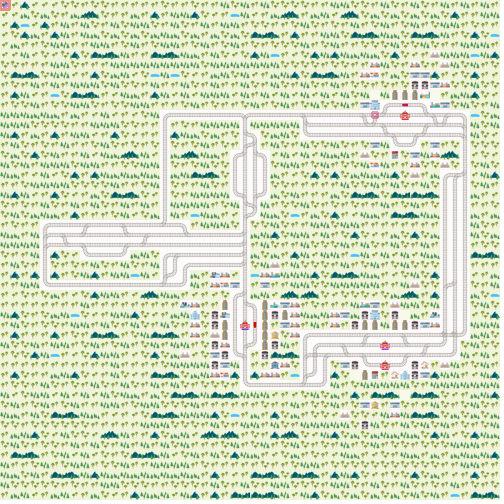

In [299]:
import PIL

def render_env(env):
    env_renderer = RenderTool(env, gl="PILSVG")
    
    for i in range(4):
        
        if i == 1:
            env.dev_obs_dict[i] = [(11, 37)]
        
        elif i == 6:
            env.dev_obs_dict[i] = [(10, 41), (10, 42), (11, 42), (11, 43), (11, 44), (11, 45), (11, 46), (12, 46), (13, 46), (14, 46), (15, 46), (16, 46), (17, 46), (18, 46), (19, 46), (20, 46), (21, 46), (22, 46), (23, 46), (24, 46), (25, 46), (26, 46), (27, 46), (28, 46), (29, 46), (30, 46), (31, 46), (32, 46), (33, 46), (33, 46), (33, 46), (33, 45), (33, 44), (33, 43), (33, 42), (33, 41), (33, 40), (33, 39), (33, 38), (33, 37), (33, 36), (34, 36), (34, 35), (34, 34), (34, 33), (34, 32), (34, 31), (35, 31), (36, 31), (36, 31), (37, 31), (37, 30), (38, 30), (38, 29), (38, 28), (38, 27), (38, 26), (38, 25), (38, 24), (37, 24), (36, 24), (35, 24), (34, 24), (33, 24), (32, 24), (31, 24), (30, 24), (29, 24), (28, 24), (27, 24), (26, 24), (25, 24), (24, 24), (23, 24), (22, 24), (21, 24), (21, 25), (20, 25), (19, 25), (19, 26), (18, 26), (17, 26)]
        
        else:
            env.dev_obs_dict[i] = [(0, 0)]
    
    
    
    env_renderer.render_env(show=True, frames=False, show_observations=True, show_predictions=False)

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    display(pil_image)
    

render_env(env)

In [86]:
class SearchAgent:
    
    def __init__(self, handle, speed):
        self.handle = handle
        self.speed = speed

    def __lt__(self, other):
        return self.speed < other.speed
    
    def __repr__(self):
        return f"Agent: {self.handle}, Speed: {self.speed}"

In [351]:
speed_ration_map = {1.: 0.25,  # Fast passenger train
                    1. / 2.: 0.25,  # Fast freight train
                    1. / 3.: 0.25,  # Slow commuter train
                    1. / 4.: 0.25}
    
env = RailEnv(width=50,
              height=50,
              rail_generator=sparse_rail_generator(
                  max_num_cities = 5,
                  grid_mode= False,
                  max_rails_between_cities = 5,
                  max_rails_in_city = 5, 
                  seed=0
              ),
              schedule_generator=sparse_schedule_generator(speed_ration_map),
              number_of_agents=4
    )

_, info = env.reset()


# Initial
_, _, _, info = env.step({i : 2 for i in range(env.get_num_agents())})




In [364]:
lst = [int(1 / speed) for speed in info["speed"].values()]


d = []

for curr_speed in range(1, max(lst)+1):
    
    acc = {}
    for handle, speed in enumerate(lst):
        
        if curr_speed <= speed:
            acc[handle] = 2
        else:
            acc[handle] = 4
    
    d.append(acc)
    

[{0: 2, 1: 2, 2: 2, 3: 2},
 {0: 2, 1: 4, 2: 4, 3: 2},
 {0: 2, 1: 4, 2: 4, 3: 2},
 {0: 2, 1: 4, 2: 4, 3: 4}]

In [361]:
info["speed"].values()

dict_values([0.25, 1.0, 1.0, 0.3333333333333333])